# Ans1.
### Pruning in Decision trees is a technique that reduces the size of decision trees by removing sections of the tree that provide little power to classify instances. Pruning reduces the complexity of the final classifier, and hence improves predictive accuracy by the reduction of overfitting. The pruning removes the subtrees of a node till the point where the accuracy of the decision tree is not reduced.
### Pruning is important in decision trees as it reduces the overfitting of model on the training set. The overfitted decision trees fail to fit additional data (Test/Validation data) or predict future observations reliably. This in turn improves the accuracy of the model when validated on the test data. The reduction in size of Decision tree also supports Occam's razor statement to select simpler solution.

# Ans2.

In [1]:
import numpy as np
import pandas as pd
from sklearn import metrics
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv ('Social Media Ad Data.csv')

In [3]:
data.head()

,User ID,Gender,Age,EstimatedSalary,Purchased
0,15624510,Male,19,19000,0
1,15810944,Male,35,20000,0
2,15668575,Female,26,43000,0
3,15603246,Female,27,57000,0
4,15804002,Male,19,76000,0


In [4]:
X = pd.DataFrame(data, columns= ['Gender','Age','EstimatedSalary'])

In [5]:
Y = pd.DataFrame(data, columns= ['Purchased'])

In [6]:
X["Gender"].replace("Male",1, inplace = True)

In [7]:
X["Gender"].replace("Female",0, inplace = True)

In [8]:
from sklearn.preprocessing import StandardScaler
Sc = StandardScaler()
X = Sc.fit_transform(X)

C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\preprocessing\data.py:645: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.partial_fit(X, y)
C:\Users\rmittal5\AppData\Local\Continuum\anaconda3\lib\site-packages\sklearn\base.py:464: DataConversionWarning: Data with input dtype int64 were all converted to float64 by StandardScaler.
  return self.fit(X, **fit_params).transform(X)


In [9]:
X_train, X_test, Y_train, Y_test = train_test_split(X,Y,test_size = 0.3, random_state = 1)

In [10]:
#Building Decision tree Classifier
classifier = DecisionTreeClassifier(criterion = "gini", max_depth= 3)
classifier = classifier.fit(X_train, Y_train)

In [11]:
Y_pred = classifier.predict(X_test)
print(Y_pred)

[0 0 1 1 1 0 0 1 0 1 0 0 0 1 1 1 1 0 0 1 0 1 1 1 1 0 1 1 1 1 0 0 0 1 0 0 0
 0 1 0 1 1 1 0 1 1 1 1 0 1 0 0 0 0 0 0 1 0 1 1 0 0 1 0 1 1 0 0 1 0 0 0 1 0
 0 1 0 0 0 0 0 1 0 0 0 0 1 0 1 0 1 1 1 0 0 1 1 0 0 0 0 0 0 1 0 1 1 1 1 1 0
 0 0 0 1 1 0 0 0 0]


In [12]:
#Evaluation metrix
from sklearn.metrics import confusion_matrix
confusion_matrix(Y_test, Y_pred)
print(confusion_matrix(Y_test, Y_pred))

[[60 12]
 [ 7 41]]


In [13]:
#Accuracy of the decision tree Classifier
print('Accuracy: ', metrics.accuracy_score(Y_test, Y_pred))

Accuracy:  0.8416666666666667


In [14]:
from sklearn.externals.six import StringIO
from IPython.display import Image
from sklearn.tree import export_graphviz
import pydotplus

In [15]:
X = pd.DataFrame(X)
feature_cols = list(X.columns)

In [16]:
dot_data = StringIO()
export_graphviz(classifier, out_file = dot_data, filled =True, rounded = True, 
                special_characters = True, feature_names = feature_cols, class_names = ['0','1'])

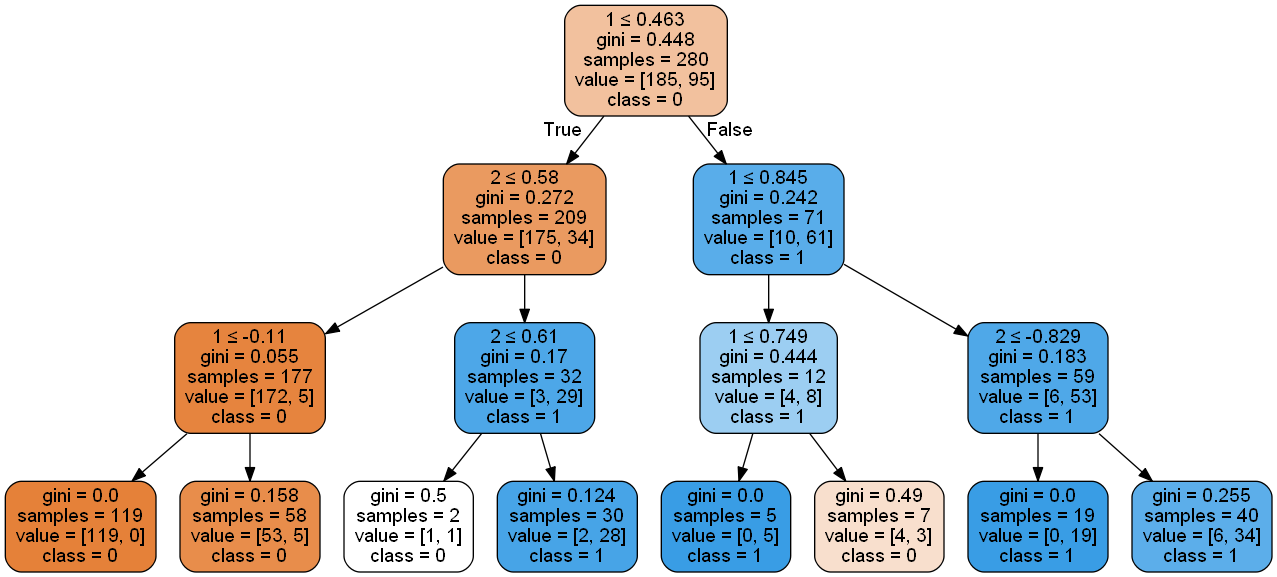

In [17]:
graph = pydotplus.graph_from_dot_data(dot_data.getvalue())
graph.write_png('Shoppingdecision.png')
Image(graph.create_png())